In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

(train_data , train_labels), (test_data , test_labels) = fashion_mnist.load_data()

In [2]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
train_data.shape , train_labels.shape , test_data.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

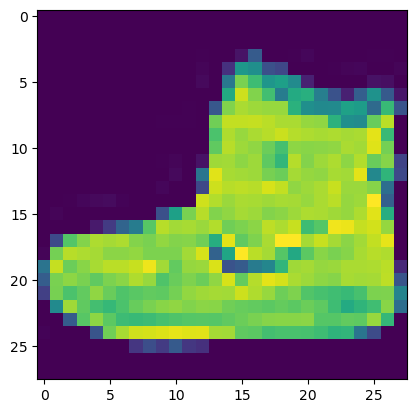

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);


In [5]:
train_labels[0]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

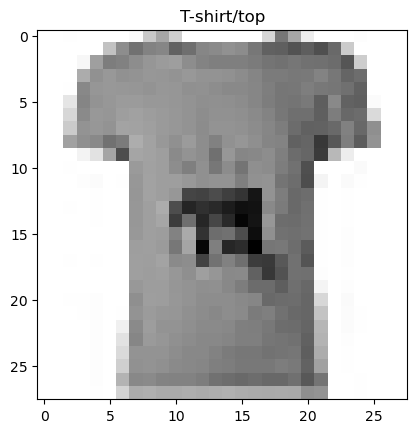

In [6]:
plt.imshow(train_data[180], cmap = plt.cm.binary)
plt.title(class_names[train_labels[180]]);

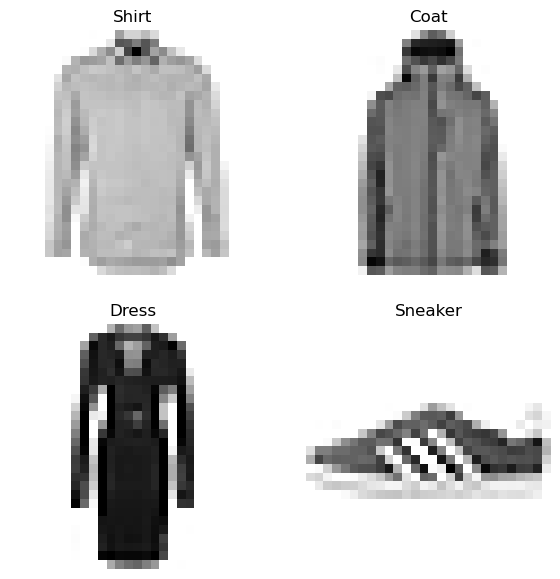

In [7]:
import random
plt.figure(figsize =(7,7))
for i in range(4):
    ax = plt.subplot(2,2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)


In [8]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax") 
])
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

non_norm_history = model_1.fit(train_data,
                                 train_labels,
                                 epochs=5,
                                 validation_data = (test_data, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 2.2852 - accuracy: 0.1163 - val_loss: 2.2094 - val_accuracy: 0.1397
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1679 - accuracy: 0.1578 - val_loss: 2.0806 - val_accuracy: 0.1967
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8721 - accuracy: 0.2235 - val_loss: 1.7411 - val_accuracy: 0.2217
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6780 - accuracy: 0.2671 - val_loss: 1.6357 - val_accuracy: 0.2927
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6129 - accuracy: 0.2965 - val_loss: 1.5873 - val_accuracy: 0.3080


In [9]:
model_1.evaluate(test_data, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 1.5873 - accuracy: 0.3080


[1.5872951745986938, 0.30799999833106995]

In [10]:
train_data.min() , train_data.max()

(0, 255)

In [11]:
train_data = train_data/255.0 
test_data = test_data/255.0


In [12]:
train_data.min() , train_data.max()


(0.0, 1.0)

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=5,
                            validation_data = (test_data , test_labels))


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9210 - accuracy: 0.6955 - val_loss: 0.6535 - val_accuracy: 0.7777
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6083 - accuracy: 0.7892 - val_loss: 0.6463 - val_accuracy: 0.7680
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5730 - accuracy: 0.8014 - val_loss: 0.6036 - val_accuracy: 0.7890
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5538 - accuracy: 0.8095 - val_loss: 0.5705 - val_accuracy: 0.8067
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5404 - accuracy: 0.8116 - val_loss: 0.5780 - val_accuracy: 0.8016


In [14]:
model_2.evaluate(test_data , test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.5780 - accuracy: 0.8016


[0.5780255794525146, 0.8015999794006348]

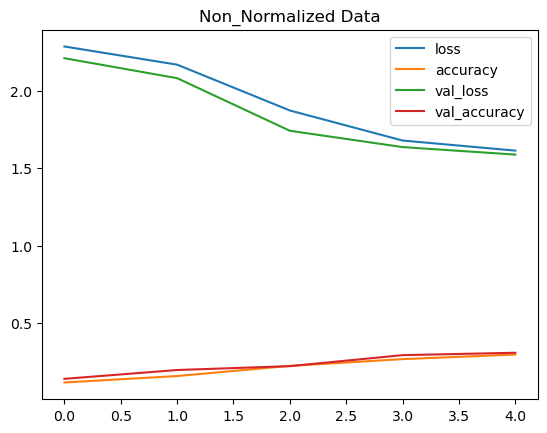

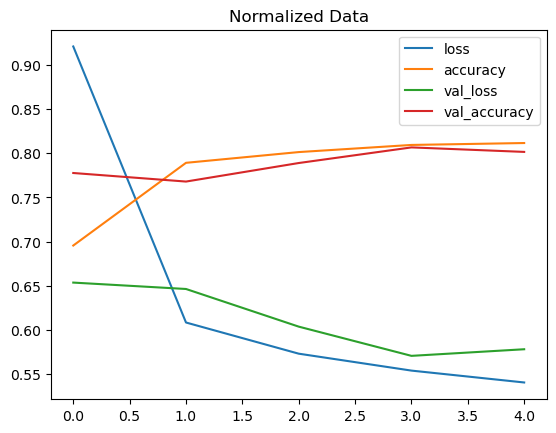

In [15]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title = "Non_Normalized Data")
pd.DataFrame(norm_history.history).plot(title = "Normalized Data");

In [16]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_3.fit(train_data,
                               train_labels,
                               epochs=5, 
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9497 - accuracy: 0.6637 - val_loss: 0.6811 - val_accuracy: 0.7629 - lr: 0.0010
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6217 - accuracy: 0.7773 - val_loss: 0.6142 - val_accuracy: 0.7780 - lr: 0.0011
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5730 - accuracy: 0.7949 - val_loss: 0.5920 - val_accuracy: 0.7926 - lr: 0.0013
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5488 - accuracy: 0.8085 - val_loss: 0.5530 - val_accuracy: 0.8080 - lr: 0.0014
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5327 - accuracy: 0.8144 - val_loss: 0.5703 - val_accuracy: 0.7964 - lr: 0.0016


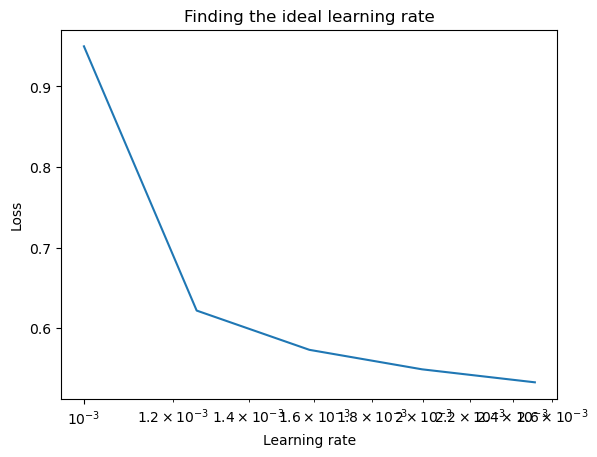

In [21]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(5)/10))
plt.semilogx(lrs, find_lr_history.history["loss"]) 
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [26]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

history = model_4.fit(train_data,
                       train_labels,
                       epochs=5,
                       validation_data=(test_data, test_labels))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5958 - accuracy: 0.3752 - val_loss: 1.2660 - val_accuracy: 0.4712
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9967 - accuracy: 0.6272 - val_loss: 0.8592 - val_accuracy: 0.7020
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7044 - accuracy: 0.7706 - val_loss: 0.6503 - val_accuracy: 0.7866
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5979 - accuracy: 0.8028 - val_loss: 0.5896 - val_accuracy: 0.8006
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8106 - val_loss: 0.5686 - val_accuracy: 0.8021


In [27]:
model_4.evaluate(test_data , test_labels)


313/313 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.8021


[0.5685950517654419, 0.8021000027656555]

In [28]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)



In [29]:
y_probs = model_4.predict(test_data) 
y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[1.62975837e-07, 2.85617592e-08, 5.08240339e-10, 6.01472348e-05,
        6.21506473e-08, 9.14822519e-02, 1.03994445e-07, 1.34118661e-01,
        1.09301473e-03, 7.73245513e-01],
       [1.21728843e-03, 1.06650027e-07, 9.12930727e-01, 3.90137842e-07,
        3.57793085e-02, 5.06711721e-11, 5.00367396e-02, 2.08641562e-13,
        3.54665717e-05, 6.52016687e-16],
       [1.53475972e-02, 9.02000844e-01, 7.58840377e-03, 5.75101189e-02,
        4.67457203e-03, 1.78221916e-03, 8.27107020e-03, 1.20866916e-03,
        4.70147934e-04, 1.14631047e-03],
       [1.53475972e-02, 9.02000844e-01, 7.58840377e-03, 5.75101189e-02,
        4.67457203e-03, 1.78221916e-03, 8.27107020e-03, 1.20866916e-03,
        4.70147934e-04, 1.14631047e-03],
       [1.46546811e-01, 4.51621367e-04, 2.91903883e-01, 1.76010486e-02,
        7.28617460e-02, 2.22202652e-06, 4.59213346e-01, 2.90031949e-06,
        1.14163710e-02, 2.20542393e-08]], dtype=float32)

In [30]:
y_preds = y_probs.argmax(axis=1)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[801,  15,  21,  74,   5,   1,  74,   0,   8,   1],
       [  1, 952,  14,  29,   2,   0,   2,   0,   0,   0],
       [ 29,   6, 697,  13, 190,   0,  64,   0,   1,   0],
       [ 56,  23,   9, 822,  35,   0,  51,   0,   4,   0],
       [  1,   3, 134,  35, 770,   0,  50,   0,   7,   0],
       [  0,   1,   0,   2,   0, 880,   0,  87,   1,  29],
       [229,  11, 156,  44, 193,   0, 359,   0,   8,   0],
       [  0,   0,   0,   0,   0,  18,   0, 932,   0,  50],
       [  8,   2,   2,  19,  20,  13,  55,   7, 874,   0],
       [  0,   0,   0,   5,   0,  10,   1,  50,   0, 934]], dtype=int64)

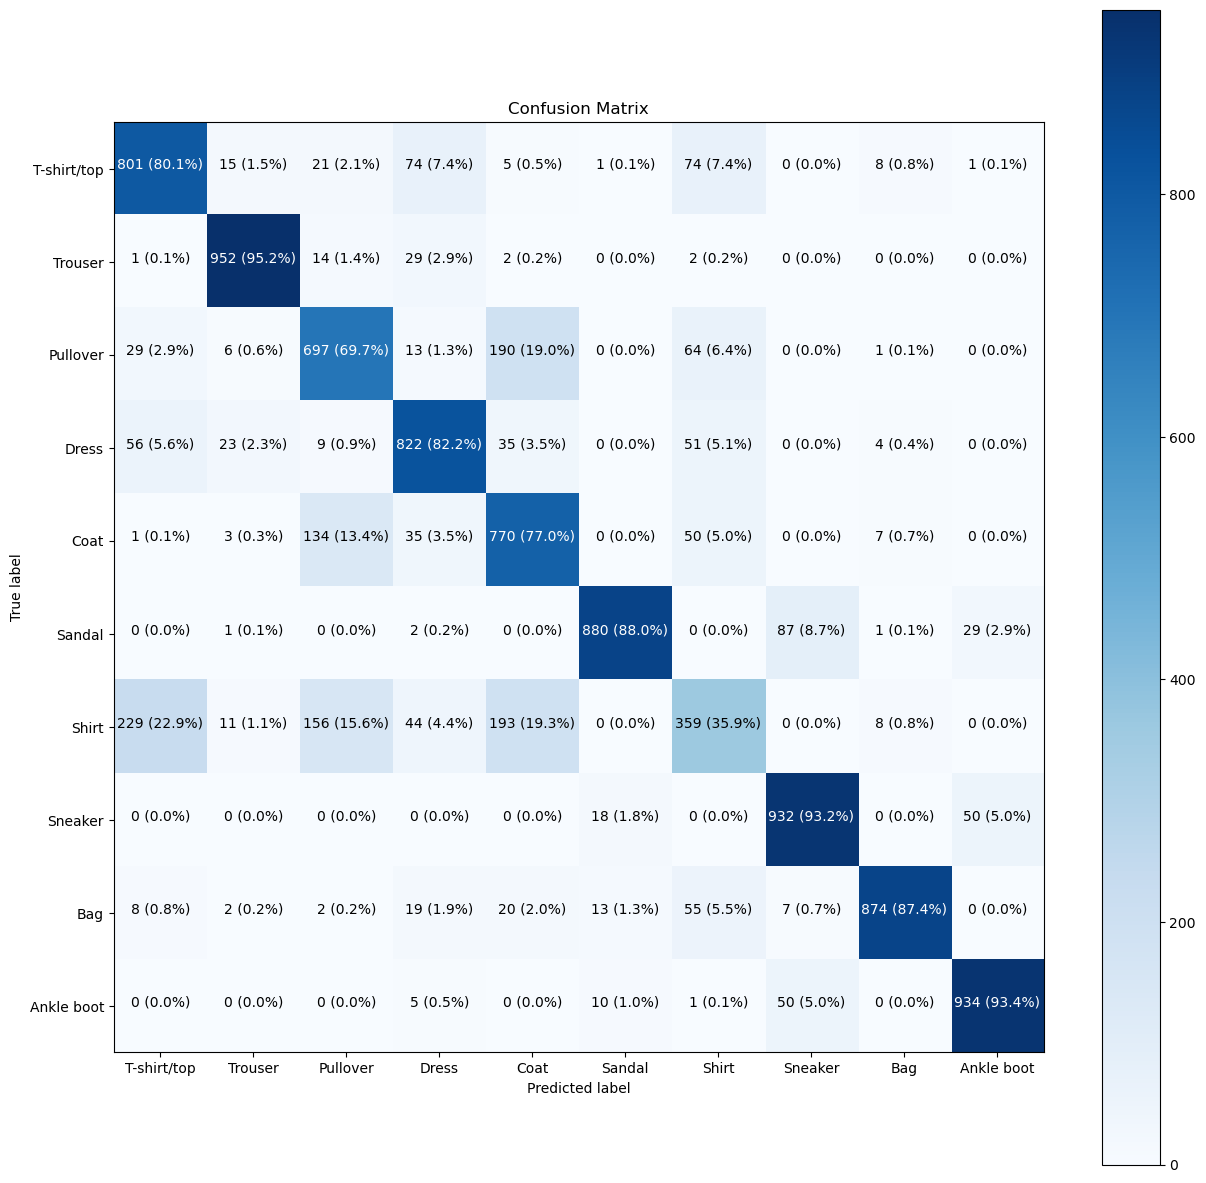

In [32]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [33]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  plt.imshow(target_image, cmap=plt.cm.binary)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

1/1 [==============================] - 0s 18ms/step


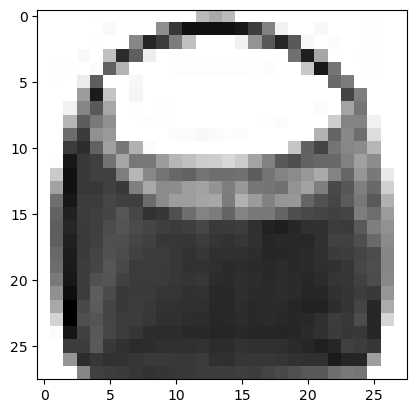

In [34]:
plot_random_image(model=model_4, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [36]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ",accuracy_score(test_labels,y_preds)*100)

Accuracy :  80.21000000000001
